In [2]:
# to be run after Locate_Device; by caleb fried 04/2022

# by caleb fried 04/2022

#initilization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import savemat
import os
import h5py as h5
import time
ax = {'x':1,'y':0,'z':2}
#define a dict of axes to make things simpler

In [3]:
from auspex.instruments import SR865
from pyanc350.v4 import Positioner

could not find anc350v2.dll
could not find anc350v3.dll


In [4]:
lockin = SR865()
lockin.connect('GPIB0::9::INSTR')   
anc = Positioner()
#instantiate positioner as anc
print('-------------------------------------------------------------')
print('capacitances:')
for axis in sorted(ax.keys()):
    print(axis,anc.measureCapacitance(ax[axis]))
    anc.setFrequency(ax[axis],100)
    anc.setAmplitude(ax[axis],15)
anc.setAmplitude(ax['z'],25)

auspex-WARNING: 2022-05-23 15:04:00,304 ----> User-provided IP {} is a valid IP address but does not appear to be in human-readable format.
-------------------------------------------------------------
capacitances:
x 1.802297e-06
y 1.786725e-06
z 1.25962e-06


In [10]:
# specify location to move piezos to

movex = 8e-3
movez = 5e-3

# LL corner of giant si void

#movex = 0.012796
#movez = 0.002641

#near silicon window
#movex = 0.010663645
#movez = 0.001586921

anc.setAxisOutput(ax['x'], 1, 0)
anc.setTargetRange(ax['x'],1e-7)
anc.setTargetPosition(ax['x'], movex) # assuming right is forward
anc.startAutoMove(ax['x'], 1, 0)
time.sleep(1)
moving = 1
target = 0
while target == 0:
    connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['x']) #find bitmask of status
    if target == 1:
        print('axis moved to x=',anc.getPosition(ax['x']))

anc.setAxisOutput(ax['z'], 1, 0)
anc.setTargetRange(ax['z'],1e-7)
anc.setTargetPosition(ax['z'], movez) # assuming right is forward
anc.startAutoMove(ax['z'], 1, 0)
time.sleep(1)
moving = 1
target = 0
while target == 0:
    connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['z']) #find bitmask of status
    if target == 1:
        print('axis moved to z=',anc.getPosition(ax['z']))

axis moved to x= 0.008000253
axis moved to z= 0.004999887


In [5]:
# scan z, raster x

centerx = 9.832e-3
centerz = 2.650e-3
windowx = 200e-6 # si units
windowz = 200e-6 # si units
nx = 41
nz = 41

positionsx = np.linspace(centerx - 0.5*windowx, centerx + 0.5*windowx, nx)
positionsz = np.linspace(centerz - 0.5*windowz, centerz + 0.5*windowz, nz)
reflectance = np.zeros((len(positionsx),len(positionsz)))

# condition scanners to account for hysteresis

for m in range(2):

    anc.setAxisOutput(ax['x'], 1, 0)
    anc.setTargetRange(ax['x'],1e-7)
    anc.setTargetPosition(ax['x'], positionsx[0]) # assuming right is forward
    anc.startAutoMove(ax['x'], 1, 0)
    time.sleep(1)
    moving = 1
    target = 0
    while target == 0:
        connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['x']) #find bitmask of status
        if target == 1:
            print('axis moved to x=',anc.getPosition(ax['x']))
            
    anc.setAxisOutput(ax['z'], 1, 0)
    anc.setTargetRange(ax['z'],1e-7)
    anc.setTargetPosition(ax['z'], positionsz[0]) # assuming right is forward
    anc.startAutoMove(ax['z'], 1, 0)
    time.sleep(1)
    moving = 1
    target = 0
    while target == 0:
        connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['z']) #find bitmask of status
        if target == 1:
            print('axis moved to z=',anc.getPosition(ax['z']))

    anc.setAxisOutput(ax['x'], 1, 0)
    anc.setTargetRange(ax['x'],1e-7)
    anc.setTargetPosition(ax['x'], positionsx[len(positionsx)-1]) # assuming right is forward
    anc.startAutoMove(ax['x'], 1, 0)
    time.sleep(1)
    moving = 1
    target = 0
    while target == 0:
        connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['x']) #find bitmask of status
        if target == 1:
            print('axis moved to x=',anc.getPosition(ax['x']))

    anc.setAxisOutput(ax['z'], 1, 0)
    anc.setTargetRange(ax['z'],1e-7)
    anc.setTargetPosition(ax['z'], positionsz[len(positionsz)-1]) # assuming right is forward
    anc.startAutoMove(ax['z'], 1, 0)
    time.sleep(1)
    moving = 1
    target = 0
    while target == 0:
        connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['z']) #find bitmask of status
        if target == 1:
            print('axis moved to z=',anc.getPosition(ax['z']))
            
    anc.setAxisOutput(ax['z'], 1, 0)
    anc.setTargetRange(ax['z'],1e-7)
    anc.setTargetPosition(ax['z'], positionsz[0]) # assuming right is forward
    anc.startAutoMove(ax['z'], 1, 0)
    time.sleep(1)
    moving = 1
    target = 0
    while target == 0:
        connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['z']) #find bitmask of status
        if target == 1:
            print('axis moved to z=',anc.getPosition(ax['z']))
            
    anc.setAxisOutput(ax['x'], 1, 0)
    anc.setTargetRange(ax['x'],1e-7)
    anc.setTargetPosition(ax['x'], positionsx[0]) # assuming right is forward
    anc.startAutoMove(ax['x'], 1, 0)
    time.sleep(1)
    moving = 1
    target = 0
    while target == 0:
        connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['x']) #find bitmask of status
        if target == 1:
            print('axis moved to x=',anc.getPosition(ax['x']))

for i in range(len(positionsx)):
    anc.setAxisOutput(ax['x'], 1, 0)
    anc.setTargetRange(ax['x'],1e-7)
    anc.setTargetPosition(ax['x'], positionsx[i]) # assuming right is forward
    anc.startAutoMove(ax['x'], 1, 0)
    time.sleep(1)
    moving = 1
    target = 0
    while target == 0:
        connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['x']) #find bitmask of status
        if target == 1:
            print('Row: ', i)
            print('axis moved to x=',anc.getPosition(ax['x']))
    for j in range(len(positionsz)):
        anc.setAxisOutput(ax['z'], 1, 0)
        anc.setTargetRange(ax['z'],1e-7)
        anc.setTargetPosition(ax['z'], positionsz[j]) # assuming right is forward
        anc.startAutoMove(ax['z'], 1, 0)
        time.sleep(0.5)
        moving = 1
        target = 0
        while target == 0:
            connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['z']) #find bitmask of status
            if target == 1:
                print('axis moved to z=',anc.getPosition(ax['z']))
        time.sleep(0.5)
        reflectance[i,j] = lockin.x
print('scan finished')

# go back to start of scan window
        
anc.setAxisOutput(ax['z'], 1, 0)
anc.setTargetRange(ax['z'],1e-7)
anc.setTargetPosition(ax['z'], positionsz[0]) # assuming right is forward
anc.startAutoMove(ax['z'], 1, 0)
time.sleep(1)
moving = 1
target = 0
while target == 0:
    connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['z']) #find bitmask of status
    if target == 1:
        print('axis moved to z=',anc.getPosition(ax['z']))

anc.setAxisOutput(ax['x'], 1, 0)
anc.setTargetRange(ax['x'],1e-7)
anc.setTargetPosition(ax['x'], positionsx[0]) # assuming right is forward
anc.startAutoMove(ax['x'], 1, 0)
time.sleep(1)
moving = 1
target = 0
while target == 0:
    connected, enabled, moving, target, eotFwd, eotBwd, error = anc.getAxisStatus(ax['x']) #find bitmask of status
    if target == 1:
        print('axis moved to x=',anc.getPosition(ax['x']))

axis moved to x= 0.009731477
axis moved to z= 0.00254995
axis moved to x= 0.009932022
axis moved to z= 0.002749894
axis moved to z= 0.002549943
axis moved to x= 0.009731972
axis moved to x= 0.009732071
axis moved to z= 0.002550107
axis moved to x= 0.009931554
axis moved to z= 0.002749971
axis moved to z= 0.002550074
axis moved to x= 0.009732307
Row:  0
axis moved to x= 0.009732142
axis moved to z= 0.002550012
axis moved to z= 0.002554973
axis moved to z= 0.002559922
axis moved to z= 0.002565018
axis moved to z= 0.002570097
axis moved to z= 0.002574976
axis moved to z= 0.00257997
axis moved to z= 0.002584942
axis moved to z= 0.002589963
axis moved to z= 0.002595068
axis moved to z= 0.002599928
axis moved to z= 0.002604877
axis moved to z= 0.002609976
axis moved to z= 0.002615059
axis moved to z= 0.002620051
axis moved to z= 0.00262499
axis moved to z= 0.002630053
axis moved to z= 0.002635042
axis moved to z= 0.002639933
axis moved to z= 0.002644929
axis moved to z= 0.002649943
axis move

axis moved to z= 0.00263515
axis moved to z= 0.002640079
axis moved to z= 0.002644886
axis moved to z= 0.002649919
axis moved to z= 0.00265497
axis moved to z= 0.002660158
axis moved to z= 0.002664903
axis moved to z= 0.002670159
axis moved to z= 0.002675049
axis moved to z= 0.002680089
axis moved to z= 0.002685055
axis moved to z= 0.002689991
axis moved to z= 0.002695027
axis moved to z= 0.002700045
axis moved to z= 0.002705035
axis moved to z= 0.002709985
axis moved to z= 0.002715151
axis moved to z= 0.002720125
axis moved to z= 0.002724986
axis moved to z= 0.002730092
axis moved to z= 0.00273483
axis moved to z= 0.002739909
axis moved to z= 0.002744778
axis moved to z= 0.002750056
Row:  7
axis moved to x= 0.00976696
axis moved to z= 0.002549994
axis moved to z= 0.00255494
axis moved to z= 0.002560036
axis moved to z= 0.0025648
axis moved to z= 0.002570011
axis moved to z= 0.002575102
axis moved to z= 0.002580152
axis moved to z= 0.002585046
axis moved to z= 0.00259003
axis moved to 

axis moved to z= 0.002575008
axis moved to z= 0.002579954
axis moved to z= 0.002584865
axis moved to z= 0.0025899
axis moved to z= 0.002594925
axis moved to z= 0.002600058
axis moved to z= 0.002604933
axis moved to z= 0.002610012
axis moved to z= 0.002615114
axis moved to z= 0.00261988
axis moved to z= 0.00262497
axis moved to z= 0.002629985
axis moved to z= 0.002634863
axis moved to z= 0.002639844
axis moved to z= 0.002644898
axis moved to z= 0.002649921
axis moved to z= 0.002655041
axis moved to z= 0.002659824
axis moved to z= 0.002664711
axis moved to z= 0.002669878
axis moved to z= 0.002674966
axis moved to z= 0.002680039
axis moved to z= 0.002685126
axis moved to z= 0.002690141
axis moved to z= 0.002694997
axis moved to z= 0.002699937
axis moved to z= 0.002704893
axis moved to z= 0.002710037
axis moved to z= 0.002715031
axis moved to z= 0.002719986
axis moved to z= 0.002724863
axis moved to z= 0.002729965
axis moved to z= 0.002734877
axis moved to z= 0.002740065
axis moved to z= 0

axis moved to z= 0.002725094
axis moved to z= 0.002730098
axis moved to z= 0.002735039
axis moved to z= 0.002740074
axis moved to z= 0.002745062
axis moved to z= 0.002750165
Row:  20
axis moved to x= 0.009833357
axis moved to z= 0.00255002
axis moved to z= 0.002555134
axis moved to z= 0.002559894
axis moved to z= 0.002564956
axis moved to z= 0.002569829
axis moved to z= 0.002574946
axis moved to z= 0.002580112
axis moved to z= 0.002585045
axis moved to z= 0.002590083
axis moved to z= 0.002595037
axis moved to z= 0.002599991
axis moved to z= 0.002605004
axis moved to z= 0.002609946
axis moved to z= 0.002615102
axis moved to z= 0.002620026
axis moved to z= 0.002624848
axis moved to z= 0.00262986
axis moved to z= 0.002635047
axis moved to z= 0.002639729
axis moved to z= 0.002644893
axis moved to z= 0.002649968
axis moved to z= 0.002654989
axis moved to z= 0.002659896
axis moved to z= 0.002665024
axis moved to z= 0.002669983
axis moved to z= 0.002675172
axis moved to z= 0.002679999
axis mo

axis moved to z= 0.002664842
axis moved to z= 0.002669941
axis moved to z= 0.002675064
axis moved to z= 0.002679883
axis moved to z= 0.002685026
axis moved to z= 0.00268972
axis moved to z= 0.002695215
axis moved to z= 0.002699966
axis moved to z= 0.002705137
axis moved to z= 0.002710019
axis moved to z= 0.002715098
axis moved to z= 0.002719981
axis moved to z= 0.002725002
axis moved to z= 0.002730104
axis moved to z= 0.002735057
axis moved to z= 0.002739864
axis moved to z= 0.002745008
axis moved to z= 0.002750264
Row:  27
axis moved to x= 0.00986697
axis moved to z= 0.002550089
axis moved to z= 0.002554981
axis moved to z= 0.002559908
axis moved to z= 0.002564919
axis moved to z= 0.002569989
axis moved to z= 0.002574946
axis moved to z= 0.00258002
axis moved to z= 0.00258489
axis moved to z= 0.002589945
axis moved to z= 0.002595095
axis moved to z= 0.002599951
axis moved to z= 0.002605114
axis moved to z= 0.002609962
axis moved to z= 0.002615064
axis moved to z= 0.002619842
axis move

axis moved to z= 0.002605011
axis moved to z= 0.002610041
axis moved to z= 0.002614916
axis moved to z= 0.002620029
axis moved to z= 0.002624964
axis moved to z= 0.002629905
axis moved to z= 0.002635047
axis moved to z= 0.002639901
axis moved to z= 0.002645017
axis moved to z= 0.002649975
axis moved to z= 0.002655094
axis moved to z= 0.002659995
axis moved to z= 0.002665079
axis moved to z= 0.00267027
axis moved to z= 0.002675074
axis moved to z= 0.002680096
axis moved to z= 0.002684971
axis moved to z= 0.002690114
axis moved to z= 0.002695291
axis moved to z= 0.002699934
axis moved to z= 0.002704957
axis moved to z= 0.002709918
axis moved to z= 0.002715074
axis moved to z= 0.002719925
axis moved to z= 0.002724993
axis moved to z= 0.002729921
axis moved to z= 0.002734965
axis moved to z= 0.002739978
axis moved to z= 0.002745211
axis moved to z= 0.002749977
Row:  34
axis moved to x= 0.009901986
axis moved to z= 0.002550058
axis moved to z= 0.002554957
axis moved to z= 0.002560129
axis m

Row:  40
axis moved to x= 0.009931477
axis moved to z= 0.002550097
axis moved to z= 0.002555255
axis moved to z= 0.002560095
axis moved to z= 0.002565069
axis moved to z= 0.002569892
axis moved to z= 0.002574784
axis moved to z= 0.002580021
axis moved to z= 0.002585011
axis moved to z= 0.002590059
axis moved to z= 0.002594908
axis moved to z= 0.002599947
axis moved to z= 0.00260491
axis moved to z= 0.002609984
axis moved to z= 0.002614939
axis moved to z= 0.002619872
axis moved to z= 0.002625107
axis moved to z= 0.002629913
axis moved to z= 0.002634963
axis moved to z= 0.002639892
axis moved to z= 0.002645138
axis moved to z= 0.002649967
axis moved to z= 0.002655109
axis moved to z= 0.002659879
axis moved to z= 0.002665017
axis moved to z= 0.00266979
axis moved to z= 0.002674997
axis moved to z= 0.002680137
axis moved to z= 0.002684993
axis moved to z= 0.00268994
axis moved to z= 0.002695136
axis moved to z= 0.002700015
axis moved to z= 0.002705086
axis moved to z= 0.002710046
axis mov

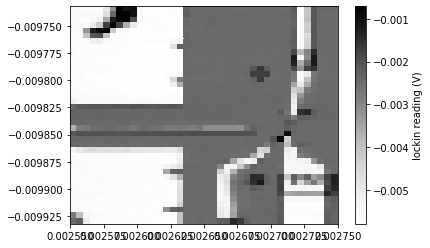

In [9]:
# pcolormesh needs the pixel edges for x and y
plot = plt.pcolormesh(positionsz, -positionsx, -1*reflectance, cmap='Greys', shading='flat')
plt.colorbar(label="lockin reading (V)", orientation="vertical")

In [12]:
savemat("PNRD02_rasterScan_20220523_1400_coarse200um.mat",{"positionsx": positionsx,"positionsz": positionsz, "reflectance": reflectance})

In [13]:
anc.disconnect()
lockin.disconnect()